In [38]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from PIL import Image as Img
from PIL import ImageTk

from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [3]:
non_best_sellers = pd.read_csv('non_best_sellers.csv')
best_sellers = pd.read_csv('best_sellers.csv')
best_sellers['image'] = best_sellers.pop('imagelist')
train = best_sellers.append(non_best_sellers)
train.pop('Unnamed: 0')

0       0
1       1
2       2
3       3
4       4
       ..
2616    0
2617    0
2618    0
2619    0
2620    0
Name: Unnamed: 0, Length: 4854, dtype: int64

In [4]:
train_image = []
best_list = []
for i in tqdm(range(len(train))):
    if list(train.best)[i] == 1:
        folder = 'best_sellers_images'
        best_list.append(1)
    else:
        folder = 'non_best_sellers_images'
        best_list.append(0)
    img = image.load_img(folder+'/'+list(train.image)[i], target_size=(128,128,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
y = np.array(best_list)
y = to_categorical(y)

100%|██████████| 4854/4854 [01:02<00:00, 77.53it/s]


In [5]:
def singleImgTest(target):
    img = image.load_img(target, target_size=(128,128,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    return model.predict(np.array([img]))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Train on 3883 samples, validate on 971 samples
Epoch 1/20
3883/3883 [==============================] - 485s 125ms/sample - loss: 0.2458 - accuracy: 0.8990 - val_loss: 0.6095 - val_accuracy: 0.7580
Epoch 2/20
3883/3883 [==============================] - 509s 131ms/sample - loss: 0.1392 - accuracy: 0.9511 - val_loss: 0.6884 - val_accuracy: 0.7487
Epoch 3/20
3883/3883 [==============================] - 422s 109ms/sample - loss: 0.0944 - accuracy: 0.9717 - val_loss: 1.0347 - val_accuracy: 0.7446
Epoch 4/20
3883/3883 [==============================] - 375s 97ms/sample - loss: 0.0662 - accuracy: 0.9779 - val_loss: 0.9148 - val_accuracy: 0.7549
Epoch 5/20
3883/3883 [==============================] - 460s 118ms/sample - loss: 0.0590 - accuracy: 0.9840 - val_loss: 0.9752 - val_accuracy: 0.7611
Epoch 6/20
3883/3883 [==============================] - 439s 113ms/sample - loss: 0.0465 - accuracy: 0.9871 - val_loss: 1.1152 - val_accuracy: 0.7621
Epoch 7/20
3883/3883 [==============================] 

In [41]:
#record model
model.save('models/cover_image.h5')

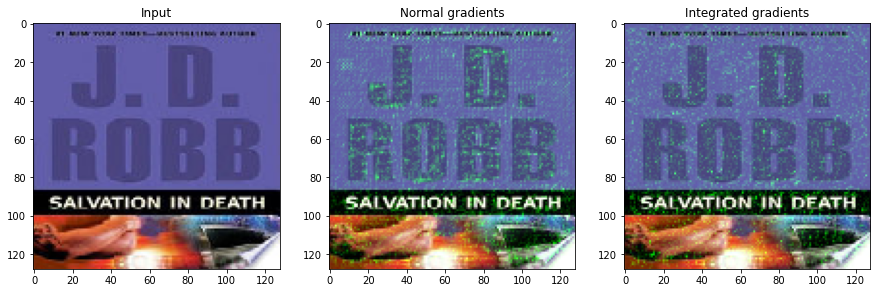

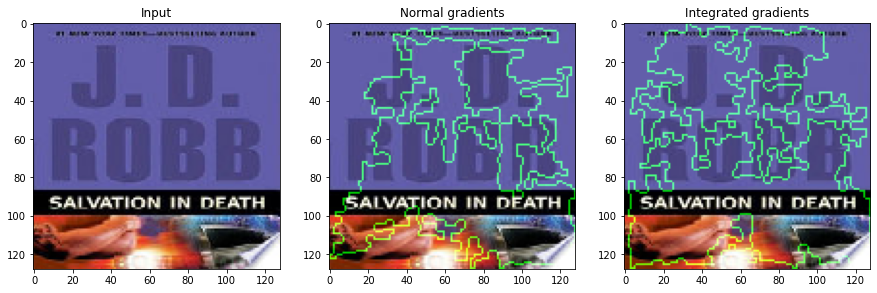

In [16]:
gradForBook('best_sellers_images/Salvation in Death.jpg')

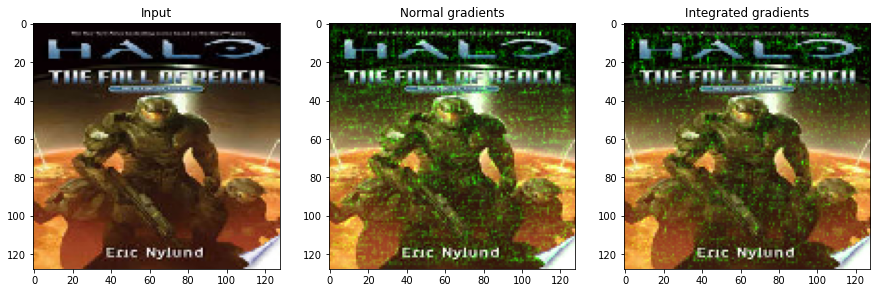

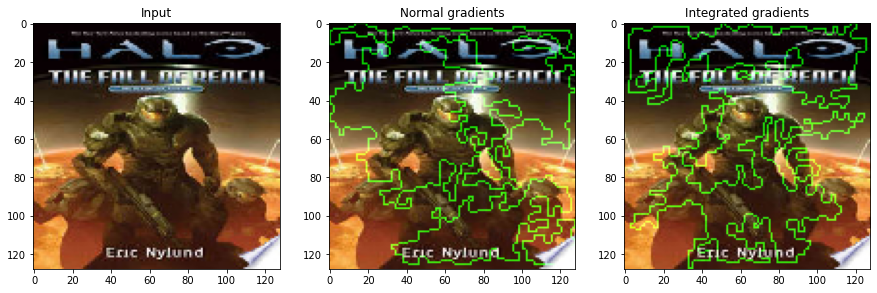

In [17]:
gradForBook('non_best_sellers_images/Halo: The Fall of Reach.jpg')

In [19]:
print(singleImgTest('best_sellers_images/Salvation in Death.jpg'))

[[0.20016631 0.79983366]]


In [43]:
scoreList = model.predict(X)
goodScore = []
for score in scoreList:
    goodScore.append(score[1])
train['score'] = goodScore

In [ ]:
'non_best_sellers/Sneaky Ass Women.jpg'

In [66]:
score_list = list(round(train['score']))

In [76]:
confusion = tf.math.confusion_matrix(labels=list(train.best), predictions=score_list, num_classes=2)
confusion

<tf.Tensor: id=36183, shape=(2, 2), dtype=int32, numpy=
array([[2498,  123],
       [ 107, 2126]], dtype=int32)>